In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [97]:
def reload_data():
    p = Path("./new_data/").glob('*.csv')

    op2df = {x.name.split('.')[0]:
             pd.read_csv(x, index_col=0)
                 for x in p if x.is_file()}

    all_ops = list(op2df.keys())
    return op2df, all_ops


def split_column(df, i=None, col=None, delim_colname=", ", delim_values=" "):
    cols = df.columns.to_list()
    if col is None:
        assert i is not None, "`i` and `col` cannot both be None"
        col = cols[i]
    df[col.split(delim_colname)] = df[col].str.split(delim_values, expand=True)
    df = df.drop(columns=col)
    return df


def plot_operation(df, 
                   plots_cols, 
                   curves_cols, 
                   x_col="Sparsity", 
                   y_col='GPU clock time', 
                   op_name=None):
    """
    x_col = "Sparsity"
    y_col = 'GPU clock time'
    plots_cols = ['shape']
    curves_cols = ["Reduce factor"]
    """
    try:
        df = df.set_index(x_col)
    except KeyError:
        pass

    grouped = df.groupby(plots_cols)

    if grouped.ngroups <= 4:
        ncols = grouped.ngroups
        nrows = 1
    else:
        ncols = 4
        nrows = int(np.ceil(grouped.ngroups/ncols))
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12 * 2, 4 * 2 * nrows)) #, sharey=True
    fig.suptitle(op_name, fontsize=16)
    
    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        gr = grouped.get_group(key)
        gr.groupby(curves_cols)[y_col].plot(marker="o", ax=ax, legend=True)
        ax.legend(title=f"{','.join(curves_cols)}")
        ax.set_title(f"{key}")
        ax.set_ylabel(y_col)

    plt.tight_layout()
    plt.show()


In [107]:
op2df, all_ops = reload_data()
all_ops

['native_sort',
 'scatter_max',
 'scatter_min',
 'scatter_mean',
 'scatter_add',
 'scatter_multiply',
 'native_addmm',
 'native_index_add_',
 'native_gather',
 'sparse_spmm',
 'sparse_spspmm',
 'sparse_transpose']

In [108]:
!ls -l ./new_data/

total 224
-rw-r--r-- 1 rhosseini users 16633 Apr 13 14:21 native_addmm.csv
-rw-r--r-- 1 rhosseini users  1293 Apr 13 14:27 native_gather.csv
-rw-r--r-- 1 rhosseini users  1287 Apr 13 14:23 native_index_add_.csv
-rw-r--r-- 1 rhosseini users  2729 Apr 13 13:41 native_sort.csv
-rw-r--r-- 1 rhosseini users  1498 Apr 13 14:01 scatter_add.csv
-rw-r--r-- 1 rhosseini users  1304 Apr 13 15:30 scatter_max.csv
-rw-r--r-- 1 rhosseini users  1240 Apr 13 13:58 scatter_mean.csv
-rw-r--r-- 1 rhosseini users  1238 Apr 13 13:54 scatter_min.csv
-rw-r--r-- 1 rhosseini users  1231 Apr 13 14:04 scatter_multiply.csv
-rw-r--r-- 1 rhosseini users  2475 Apr 13 14:33 sparse_spmm.csv
-rw-r--r-- 1 rhosseini users  2493 Apr 13 14:34 sparse_spspmm.csv
-rw-r--r-- 1 rhosseini users   522 Apr 13 14:35 sparse_transpose.csv


In [106]:
op2df['scatter_max']

,"Reduce factor, shape",Input size (>95% mem util)*,Sparsity,GPU clock time,IQR,Reduce factor,shape
0,1 LS,"(1472353280,)",0.00,0.604,0,1,LS
1,1 square,"(38000, 38000)",0.00,0.283,0,1,square
2,1 LS,"(1472353280,)",0.50,0.623,0,1,LS
3,1 square,"(38000, 38000)",0.50,0.285,0,1,square
4,1 LS,"(1472353280,)",0.90,0.662,0,1,LS
5,1 square,"(38000, 38000)",0.90,0.295,0,1,square
6,1 LS,"(1472353280,)",0.99,0.688,0,1,LS
7,1 square,"(38000, 38000)",0.99,0.300,0,1,square
8,2 LS,"(1472353280,)",0.00,0.547,0,2,LS
9,2 square,"(38000, 38000)",0.00,0.327,0,2,square


In [109]:
for op,df in op2df.items():
    print(op, df.columns.to_list())

native_sort ['Input dims, sort dim, stable', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time']
scatter_max ['Reduce factor, shape', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time', 'IQR']
scatter_min ['Reduce factor, shape', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time']
scatter_mean ['Reduce factor, shape', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time']
scatter_add ['Reduce factor, shape', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time']
scatter_multiply ['Reduce factor, shape', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time']
native_addmm ['Input dims', 'Input size (>95% mem util)*', 'Sparsities (input, matA, matB)', 'GPU clock time']
native_index_add_ ['Input dims, index dim', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time']
native_gather ['Input dims, index dim', 'Input size (>95% mem util)*', 'Sparsity', 'GPU clock time']
sparse_spmm ['Input dims', 'Input size (>95% mem util)*', 'Sparsities (inp

# plots

## `native_`

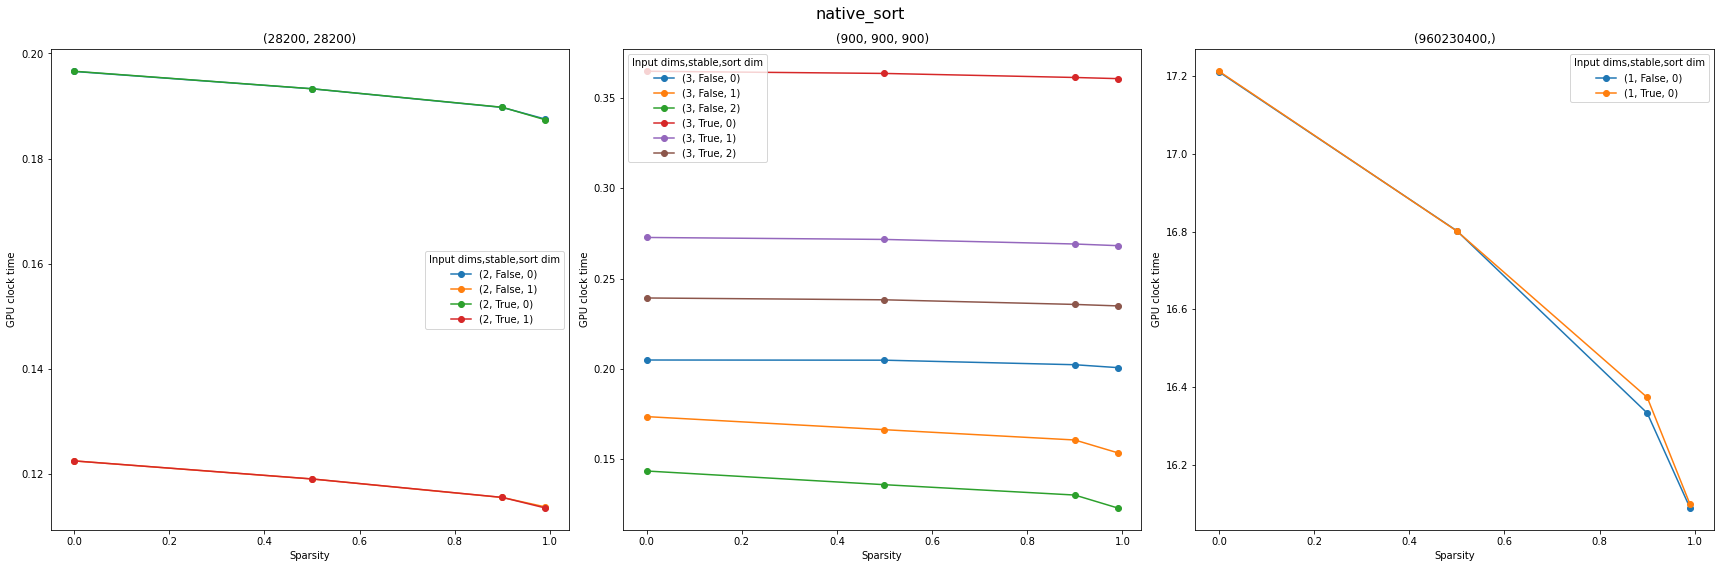

Could not plot native_addmm


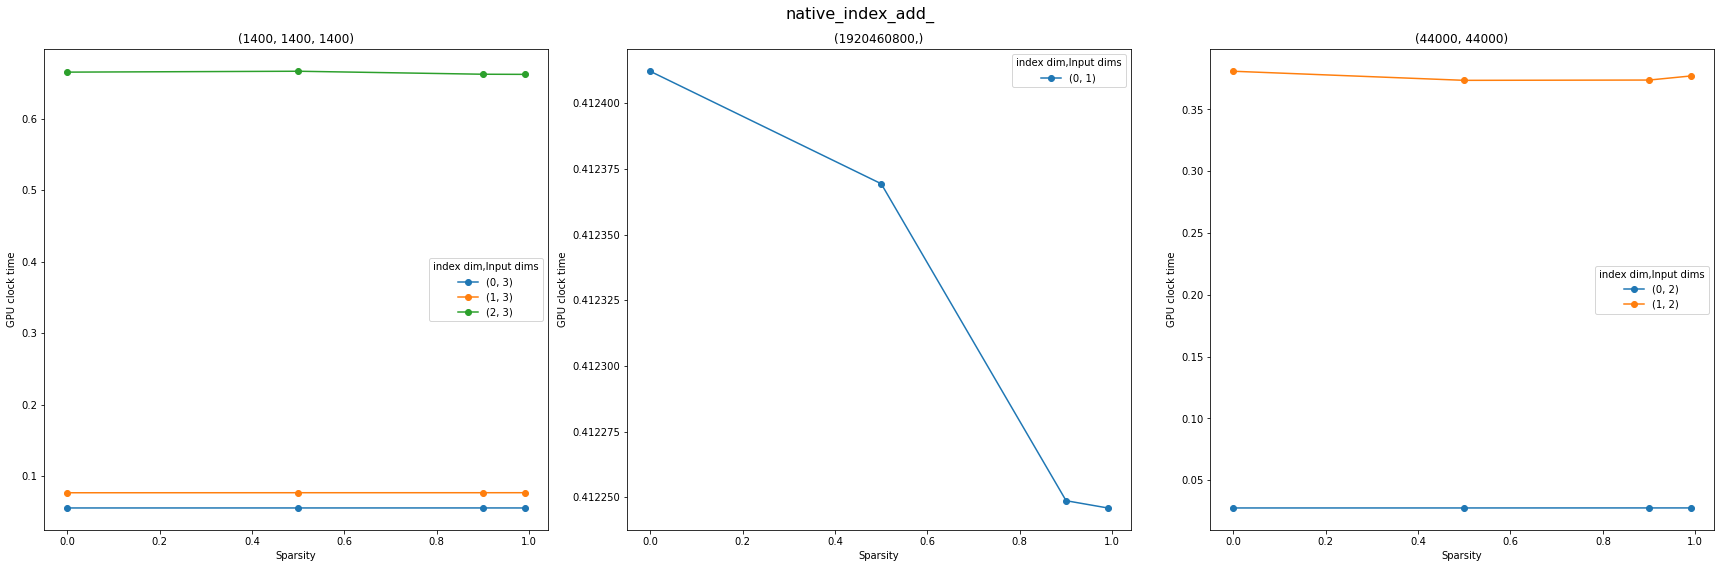

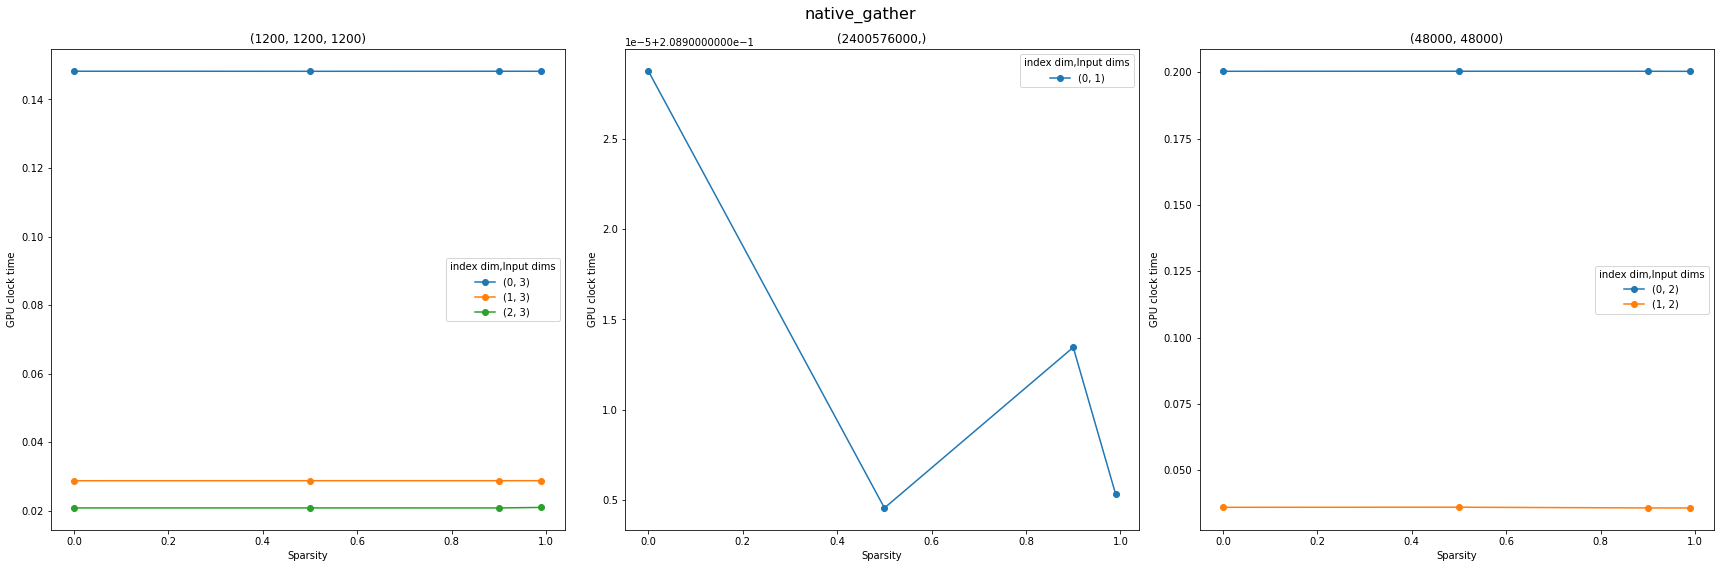

In [110]:
for op_name, _ in op2df.items():
    try:
        if "native_" in op_name:
            old_cols = set(op2df[op_name].columns)
            df = split_column(op2df[op_name], i=0, col=None, delim_colname=", ", delim_values="; ")
    #         plot_operation(df, plots_cols=["Input size (>95% mem util)*"], curves_cols=['Input dims', 'sort dim', 'stable'], op_name=op_name)
            curves_cols = list(set(df.columns) - old_cols)
            plot_operation(df, plots_cols=["Input size (>95% mem util)*"], curves_cols=curves_cols, op_name=op_name)
    except:
        print(f"Could not plot {op_name}")

## `native_addmm`

In [102]:
op2df["native_addmm"]

,Input dims,Input size (>95% mem util)*,"Sparsities (input, matA, matB)",GPU clock time
0,3,"[(48000, 48000), (48000, 48000), (48000, 48000)]",0 ; 0 ; 0,2.021733
1,3,"[(64000, 64000), (64000, 1), (1, 64000)]",0 ; 0 ; 0,0.050985
2,3,"[(64000, 1), (64000, 64000), (64000, 1)]",0 ; 0 ; 0,0.013211
3,3,"[(48000, 48000), (48000, 48000), (48000, 48000)]",0 ; 0 ; 0.5,2.019778
4,3,"[(64000, 64000), (64000, 1), (1, 64000)]",0 ; 0 ; 0.5,0.051000
...,...,...,...,...
187,3,"[(64000, 64000), (64000, 1), (1, 64000)]",0.99 ; 0.99 ; 0.9,0.051037
188,3,"[(64000, 1), (64000, 64000), (64000, 1)]",0.99 ; 0.99 ; 0.9,0.013270
189,3,"[(48000, 48000), (48000, 48000), (48000, 48000)]",0.99 ; 0.99 ; 0.99,2.018133
190,3,"[(64000, 64000), (64000, 1), (1, 64000)]",0.99 ; 0.99 ; 0.99,0.051037


NameError: name 'y_col' is not defined

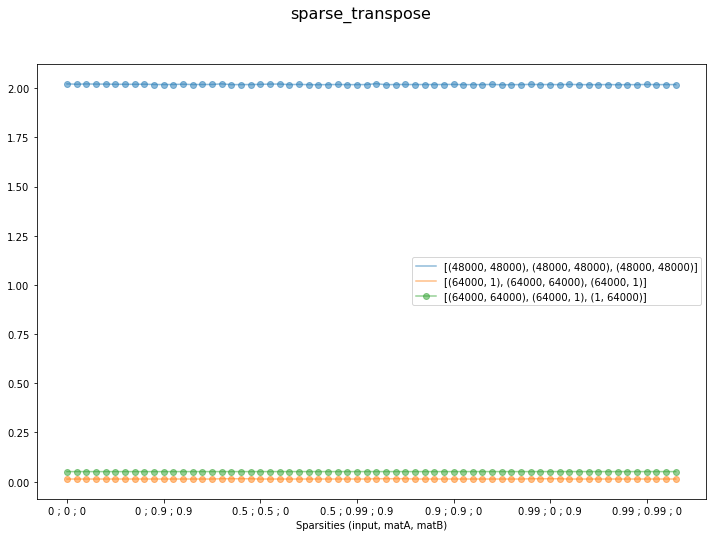

In [103]:
df = op2df['native_addmm']
df = df.set_index("Sparsities (input, matA, matB)")
curves_cols = ["Input size (>95% mem util)*"]

fig = plt.figure(figsize=(12, 8)) #, sharey=True
fig.suptitle(op_name, fontsize=16)

df.groupby(curves_cols)["GPU clock time"].plot(marker="o", legend=True, alpha=0.5)
ax.legend(title=f"{','.join(curves_cols)}")
ax.set_title(f"{key}")
ax.set_ylabel(y_col)

plt.tight_layout()
plt.show()

## `scatter_`

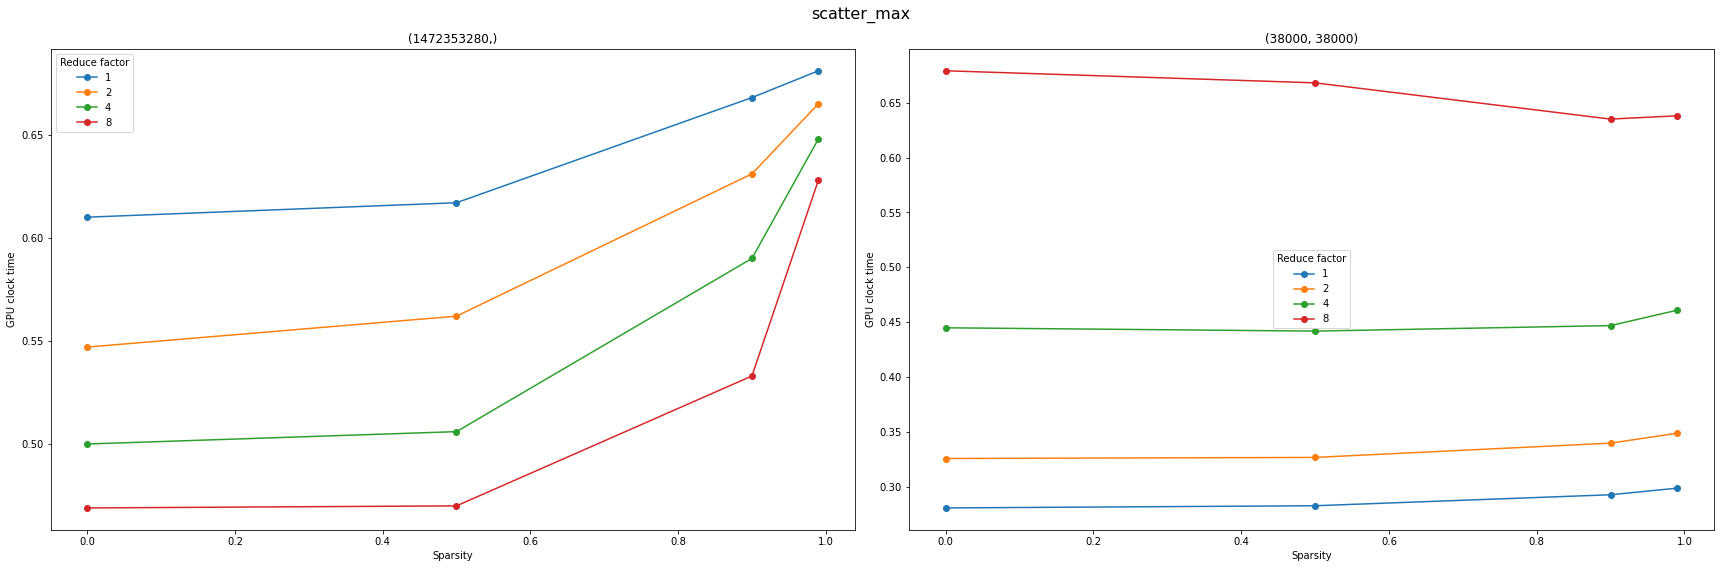

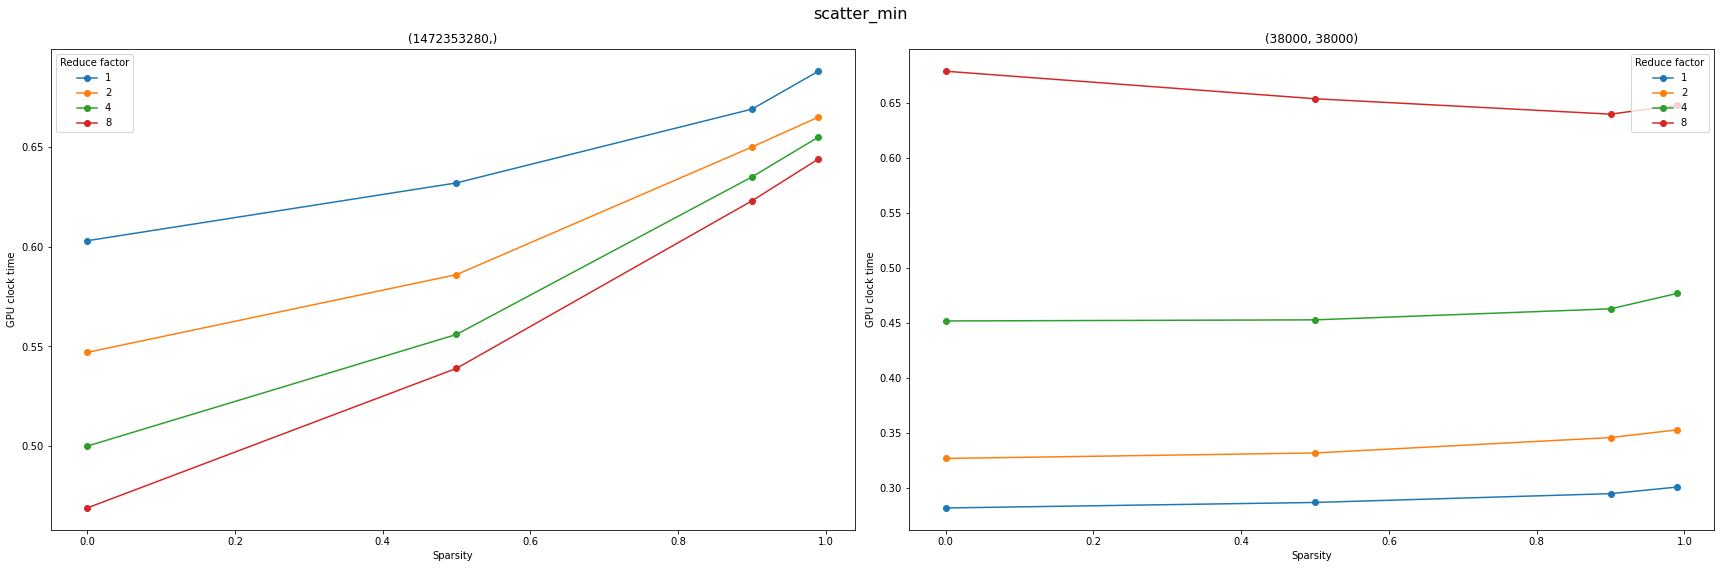

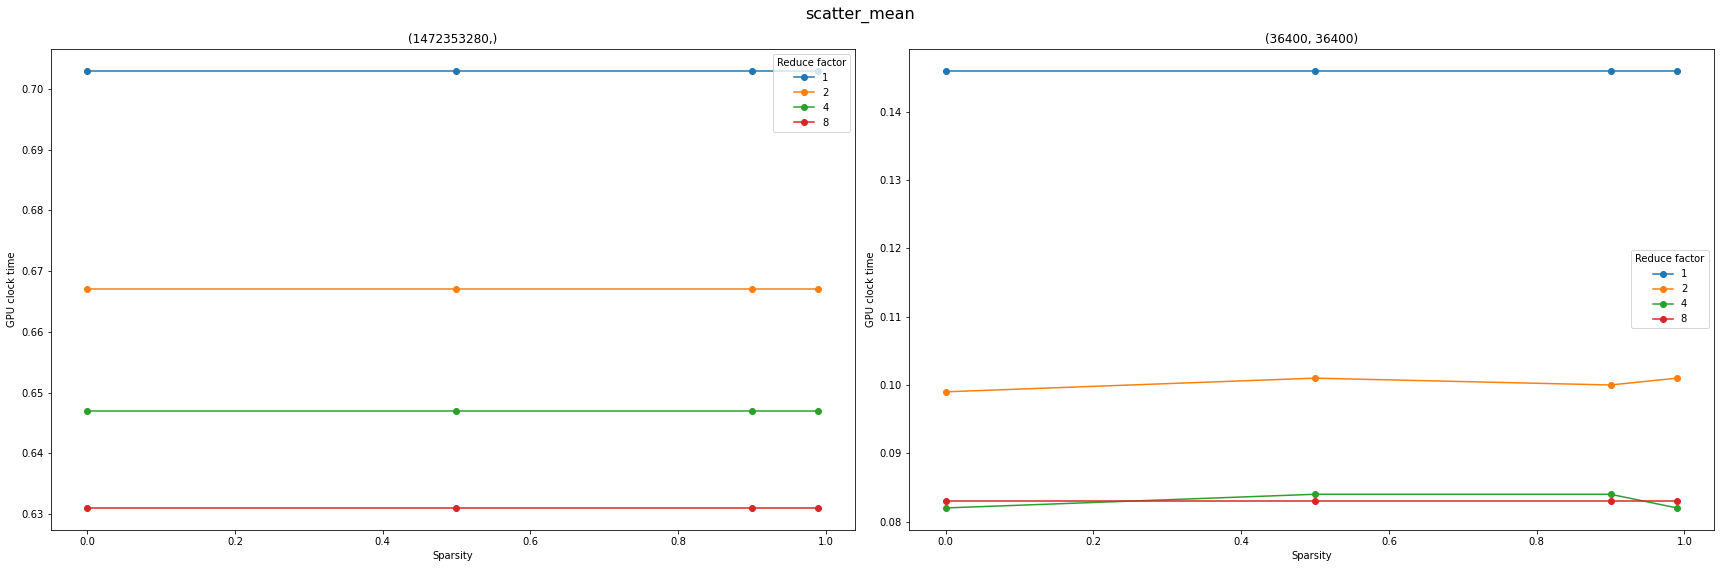

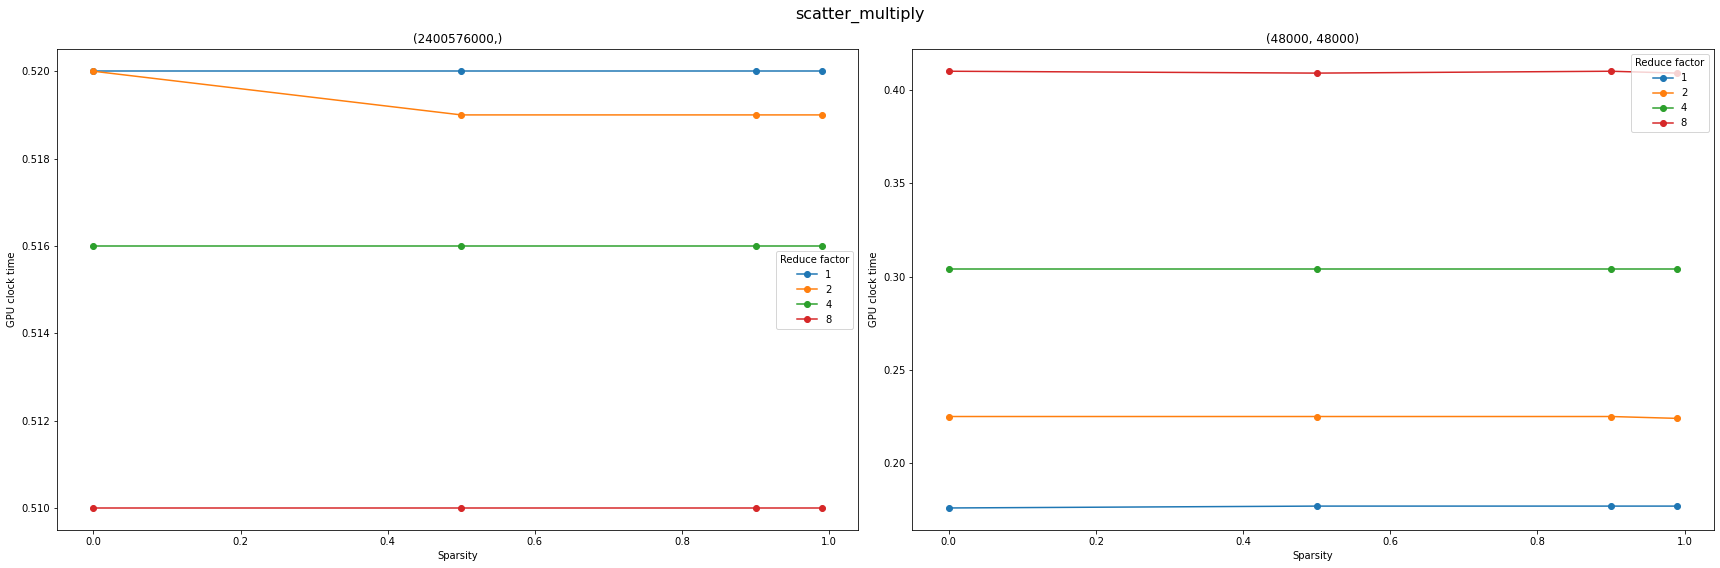

In [111]:
for op_name in all_ops:
    if "scatter_" in op_name:
        df = split_column(op2df[op_name], i=0, col=None, delim_colname=", ", delim_values=" ")
        if op_name == "scatter_add":
            continue
        plot_operation(df, plots_cols=["Input size (>95% mem util)*"], curves_cols=["Reduce factor"], op_name=op_name)

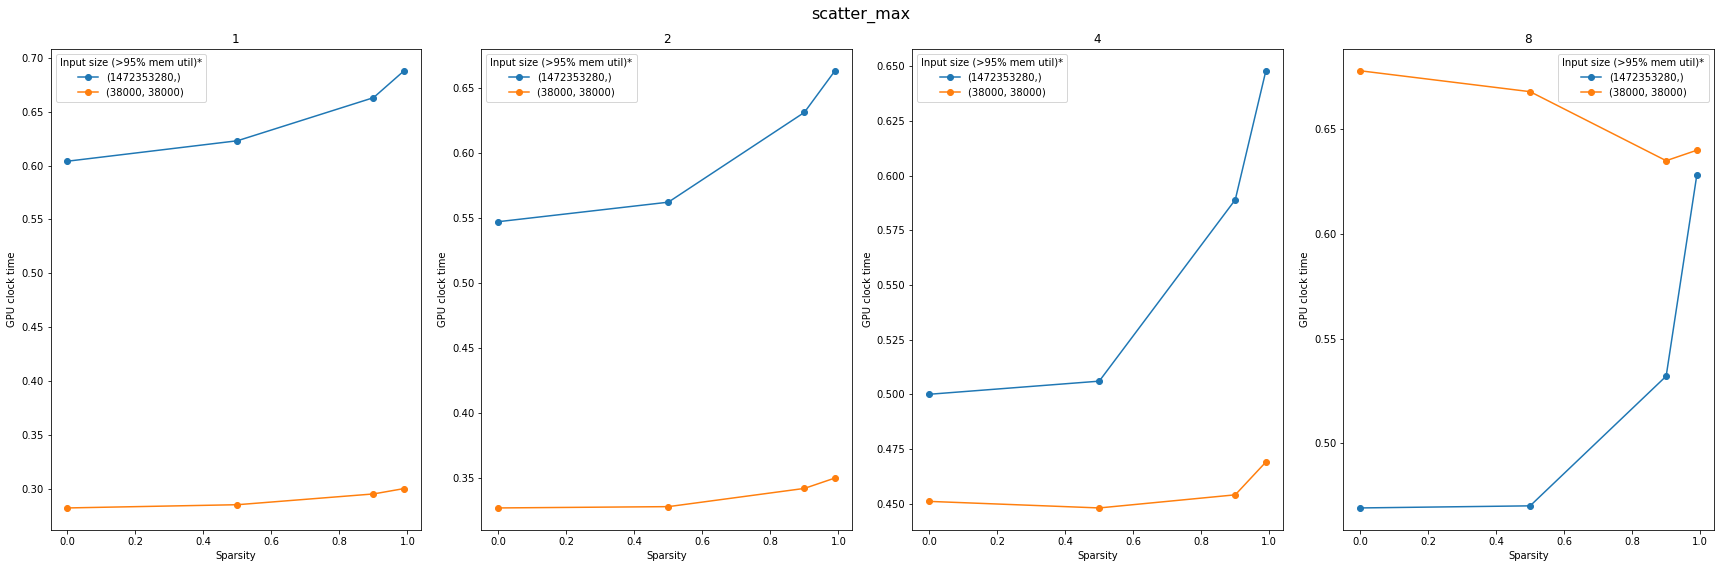

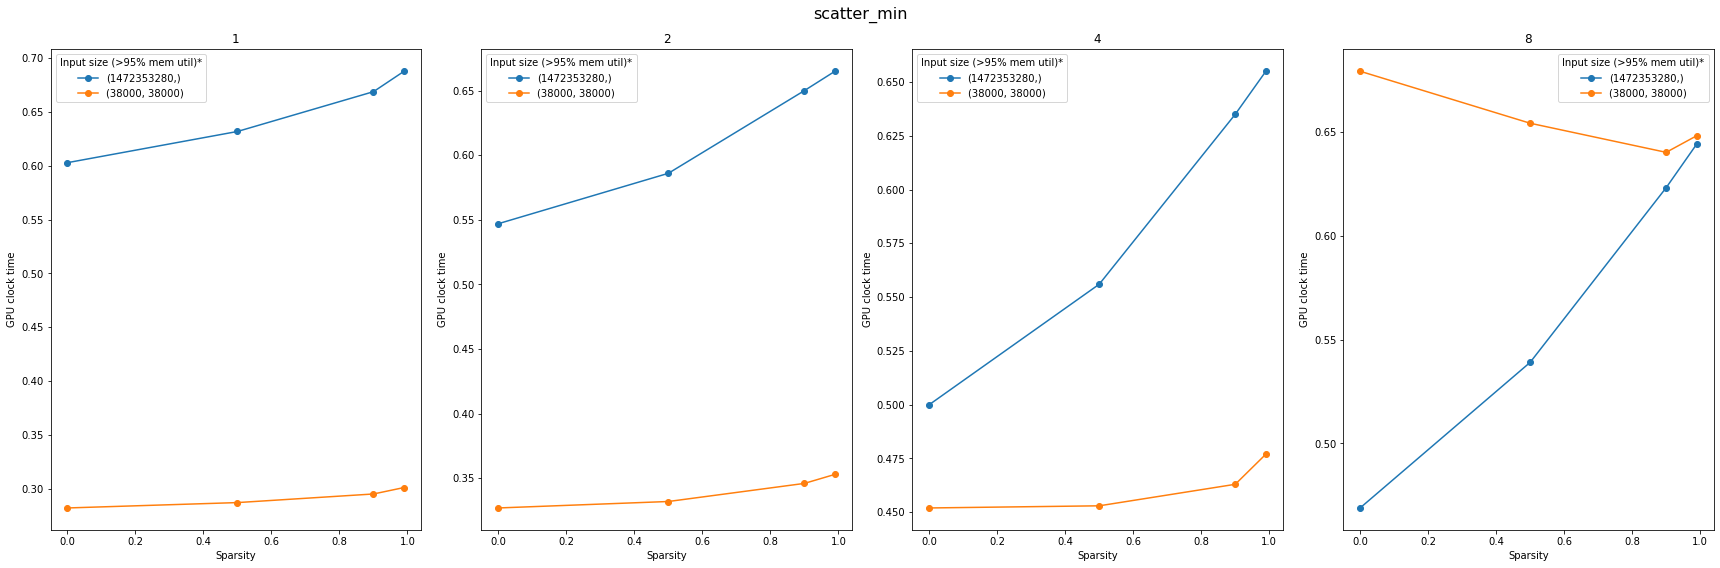

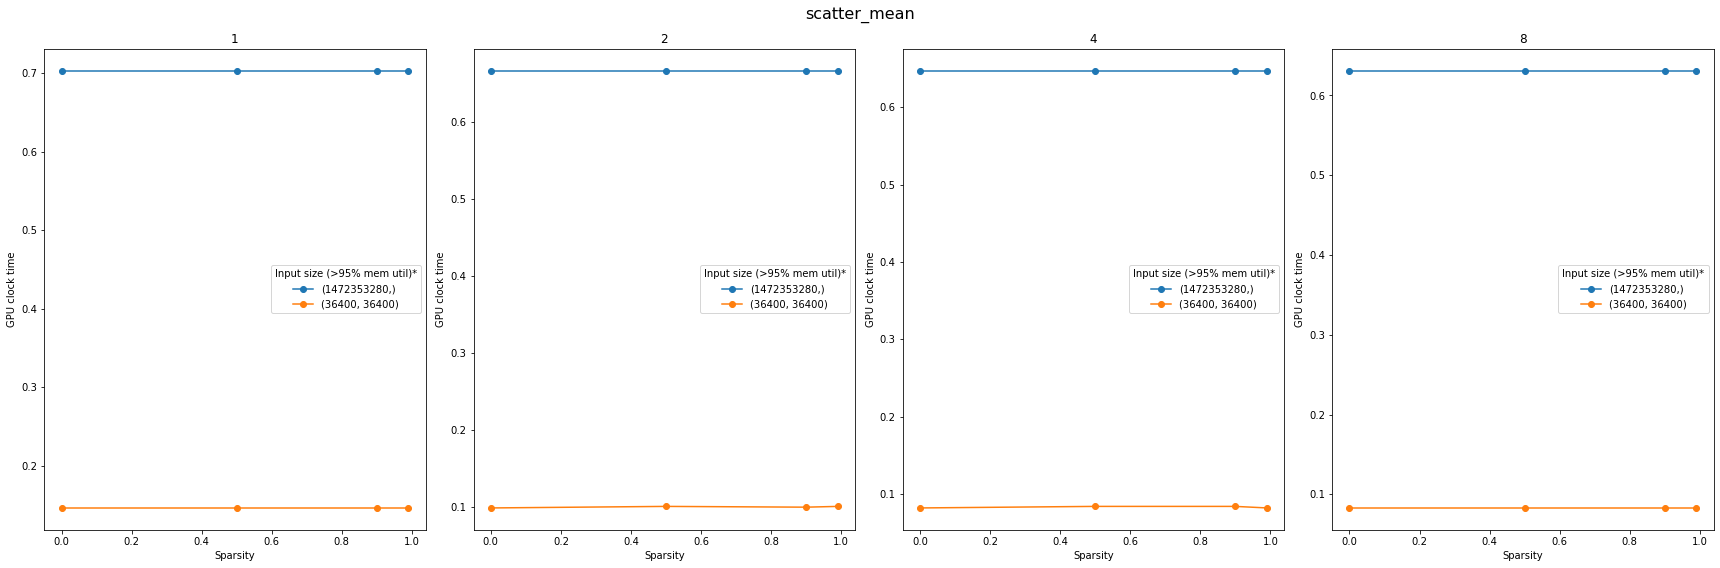

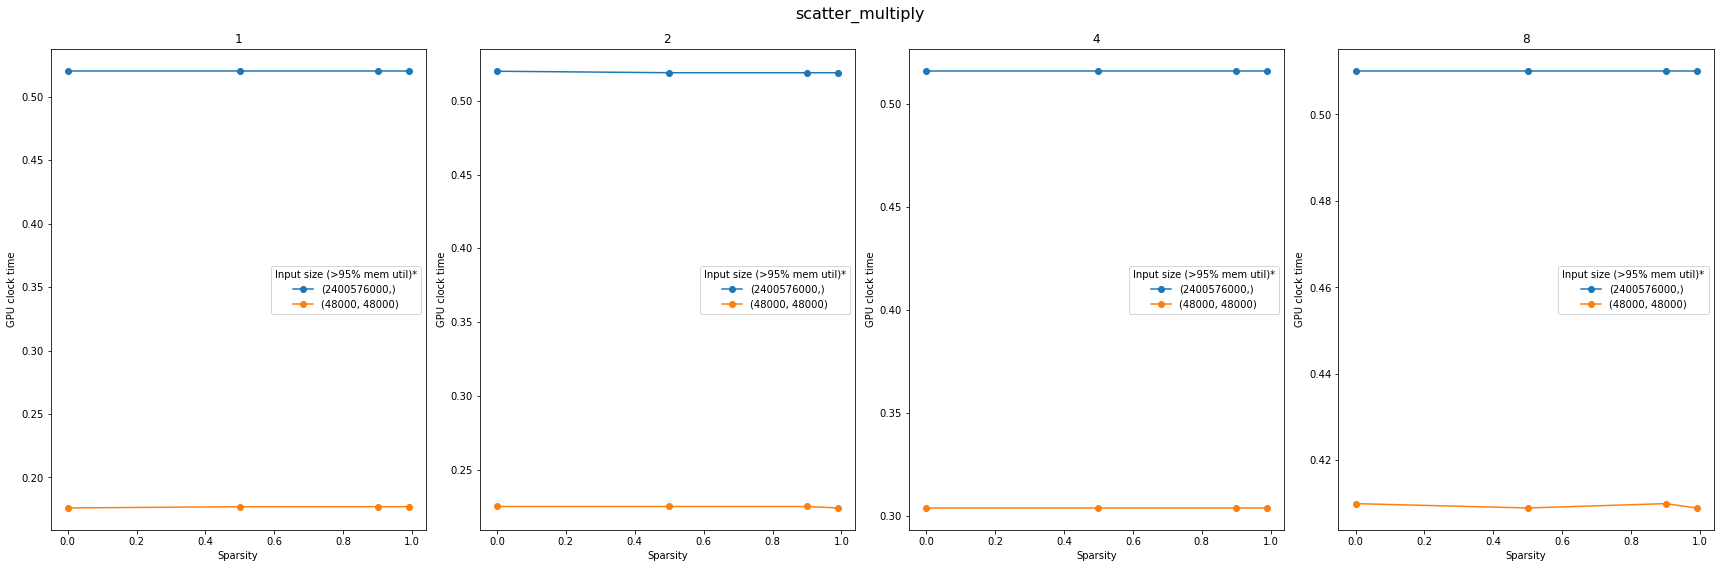

In [81]:
for op_name in all_ops:
    if "scatter_" in op_name:
        if op_name == "scatter_add":
            continue
        df = split_column(op2df[op_name], i=0, col=None, delim_colname=", ", delim_values=" ")
        plot_operation(df, plots_cols=["Reduce factor"], curves_cols=["Input size (>95% mem util)*"], op_name=op_name)

## questions

In [18]:
# scatter_add: all square but different input sizes? why some square only have 1 dim?

op2df["scatter_add"]

,"Reduce factor, shape",Input size (>95% mem util)*,Sparsity,GPU clock time,Reduce factor,shape
0,1 LS,"(2400576000,)",0.00,0.535 (0.522),1,LS
1,1 square,"(48000, 48000)",0.00,0.079 (0.066),1,square
2,1 LS,"(2400576000,)",0.50,0.535 (0.522),1,LS
3,1 square,"(48000, 48000)",0.50,0.079 (0.066),1,square
4,1 LS,"(2400576000,)",0.90,0.535 (0.522),1,LS
5,1 square,"(48000, 48000)",0.90,0.079 (0.066),1,square
6,1 LS,"(2400576000,)",0.99,0.535 (0.522),1,LS
7,1 square,"(48000, 48000)",0.99,0.079 (0.066),1,square
8,2 LS,"(2400576000,)",0.00,0.529 (0.521),2,LS
9,2 square,"(48000, 48000)",0.00,0.069 (0.066),2,square


In [19]:
# columns `shape` and `Input size (>95% mem util)*` contain the same info?

op2df["scatter_mean"].groupby(["shape"])["Input size (>95% mem util)*"].unique()

shape
LS         [(1472353280,)]
square    [(36400, 36400)]
Name: Input size (>95% mem util)*, dtype: object

In [20]:
# columns `shape` and `Input size (>95% mem util)*` contain the same info?

op2df["scatter_add"].groupby(["shape"])["Input size (>95% mem util)*"].unique()

shape
LS         [(2400576000,)]
square    [(48000, 48000)]
Name: Input size (>95% mem util)*, dtype: object

### other plot types

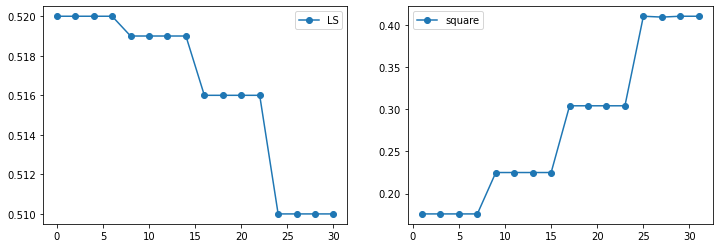

In [21]:
grouped = df.groupby('shape')

ncols = 2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,4)) #, sharey=True

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    gr = grouped.get_group(key)
    x = gr.index
    y = gr['GPU clock time']
    ax.plot(x, y, "o-", label=key)
    ax.legend()
    
plt.show()